In [1]:
import numpy as np
from sslf.sslf import Spectrum
import matplotlib.pyplot as plt
%matplotlib inline

First, an example spectrum.

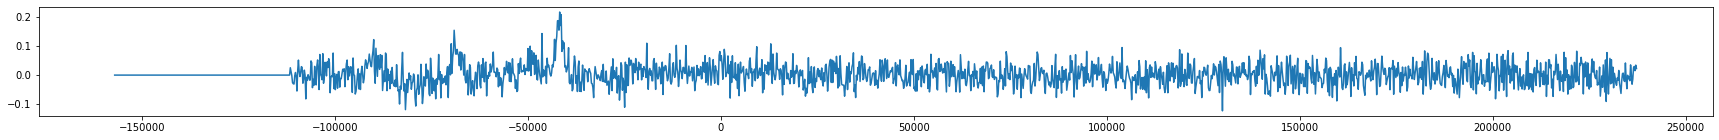

In [2]:
x, y = np.loadtxt("spectrum.txt", unpack=True)
_, ax = plt.subplots(figsize=(30, 2))
ax.plot(x, y)
plt.show()

Three lines are pretty clear here. The following shows how to use `sslf`. The `scales` parameter refers to the width of the spectral lines (in channels). If you're not sure what `scales` to use, just try something to see what falls out.

In [3]:
s = Spectrum(y, vel=x)
s.find_cwt_peaks(scales=np.arange(2, 60, 2), snr=6.5)
print(s.channel_peaks, s.vel_peaks, s.channel_edges)

[603, 463, 354] [-41784.583088549, -68557.179700132, -89401.558490578] [(593, 613), (451, 475), (334, 374)]


OK, we've found the peaks. Let's plot them.

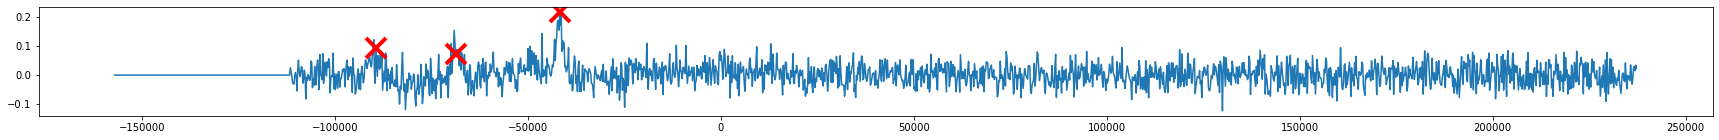

In [4]:
_, ax = plt.subplots(figsize=(30, 2))
ax.plot(x, y)

peaks = s.channel_peaks
ax.plot(x[peaks], y[peaks], marker='x', c='r', ms=20, mew=4, ls="None")
plt.show()

`sslf` can also remove the shape of the spectrum, preserving the spectral lines.

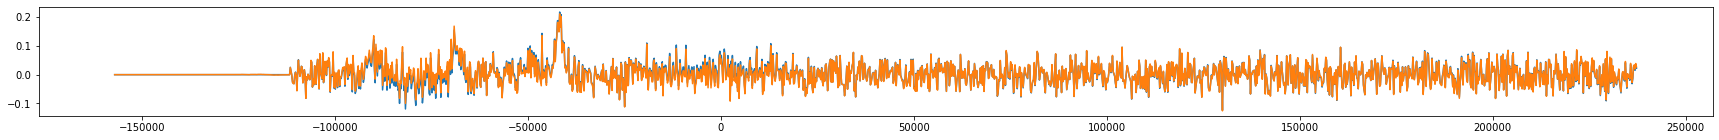

In [5]:
_, ax = plt.subplots(figsize=(30, 2))
ax.plot(s.vel, s.original)
s.subtract_bandpass()
ax.plot(s.vel, s.modified)
plt.show()

We see that there's not much difference here, because the spectrum was already pretty flat. This did make the weaker two lines a little bigger, though.

Another example.

[287] [-56.07699574530125] [(247, 327)]


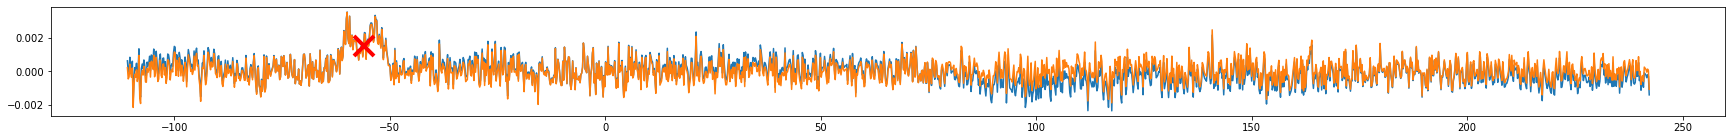

In [6]:
x, y = np.loadtxt("../tests/spectrum_3.txt", unpack=True)
s = Spectrum(y, vel=x)
s.find_cwt_peaks(scales=np.arange(2, 60, 2), snr=6.5)
s.subtract_bandpass()
print(s.channel_peaks, s.vel_peaks, s.channel_edges)

_, ax = plt.subplots(figsize=(30, 2))
ax.plot(s.vel, s.original)
ax.plot(s.vel, s.modified)
peaks = s.channel_peaks
ax.plot(x[peaks], y[peaks], marker='x', c='r', ms=20, mew=4, ls="None")
plt.show()

Just how fast is `sslf`?

In [7]:
def benchmark(spectrum, vel, min_scale, max_scale, step_scale):
    s = Spectrum(spectrum, vel=vel)
    s.find_cwt_peaks(scales=np.arange(min_scale, max_scale, step_scale), snr=6.5)
    s.subtract_bandpass()

In [8]:
x, y = np.loadtxt("../tests/spectrum_1.txt", unpack=True)

In [9]:
%timeit -n100 benchmark(y, x, 2, 20, 2)

2.54 ms ± 62.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit -n100 benchmark(y, x, 1, 60, 1)

9.18 ms ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Pretty fast (Ryzen 9 3900X).

*but it'll hopefully be much faster when I finally port this to Rust...*